<a href="https://colab.research.google.com/github/sanduni-E/SentimentAnalysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### EDA Pkgs
import pandas as pd
# Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io

data = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['tweets.csv'].decode('utf-8')))

In [ ]:
df.head()

,date,tweets
0,9/11/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...
2,9/13/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob..."
4,9/15/2021 4:15:00 AM,#Divorce During A #Pandemic https://t.co/oEsEa...


In [ ]:
# Check Columns
df.columns

Index(['date', 'tweets'], dtype='object')

In [ ]:
# Datatype
df.dtypes

date      object
tweets    object
dtype: object

In [ ]:
!pip install neattext

# Load Text Cleaning Package
import neattext.functions as nfx

# Methods/Attrib
dir(nfx)

     |████████████████████████████████| 114 kB 5.1 MB/s 


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df.head()

,date,tweets
0,9/11/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...
2,9/13/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob..."
4,9/15/2021 4:15:00 AM,#Divorce During A #Pandemic https://t.co/oEsEa...


In [ ]:
df['tweets'].iloc[2]

'RT @IS_sociology: On #domesticviolence during the #pandemic from @isagdmag ðŸ‘‡ https://t.co/raZlNNXneq'

In [ ]:
df.head()

,date,tweets
0,9/11/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...
2,9/13/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob..."
4,9/15/2021 4:15:00 AM,#Divorce During A #Pandemic https://t.co/oEsEa...


In [ ]:
df['tweets'].apply(nfx.extract_hashtags)

0                          [#domesticviolence, #pandemic]
1                                                      []
2                          [#domesticviolence, #pandemic]
3                                                      []
4       [#Divorce, #Pandemic, #childcustody, #domestic...
                              ...                        
1995    [#RenuDograGupta, #Mens, #Mens, #DomesticViole...
1996                                                   []
1997                                                   []
1998                                                   []
1999                                  [#DomesticViolence]
Name: tweets, Length: 2000, dtype: object

In [ ]:
df['extracted_hashtags'] = df['tweets'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags']]

,extracted_hashtags
0,"[#domesticviolence, #pandemic]"
1,[]
2,"[#domesticviolence, #pandemic]"
3,[]
4,"[#Divorce, #Pandemic, #childcustody, #domestic..."
...,...
1995,"[#RenuDograGupta, #Mens, #Mens, #DomesticViole..."
1996,[]
1997,[]
1998,[]


In [ ]:
# Cleaning Text
df['clean_tweet'] = df['tweets'].apply(nfx.remove_hashtags)

In [ ]:
df[['clean_tweet','tweets']]

,clean_tweet,tweets
0,RT @IS_sociology: On during the from @isag...,RT @IS_sociology: On #domesticviolence during ...
1,RT @dv_west: The story of a young pregnant wom...,RT @dv_west: The story of a young pregnant wom...
2,RT @IS_sociology: On during the from @isag...,RT @IS_sociology: On #domesticviolence during ...
3,"RT @endvawnetwork: ""She was a good person. Nob...","RT @endvawnetwork: ""She was a good person. Nob..."
4,During A https://t.co/oEsEa2lVJA,#Divorce During A #Pandemic https://t.co/oEsEa...
...,...,...
1995,RT @NoLawsForMen: A salute to for understand...,RT @NoLawsForMen: A salute to #RenuDograGupta ...
1996,RT @themaggiekim: Been taken to court 5x (and ...,RT @themaggiekim: Been taken to court 5x (and ...
1997,RT @Fbombmom29: My niece just sent this to me ...,RT @Fbombmom29: My niece just sent this to me ...
1998,âš ï¸Trigger Warning âš ï¸ If anyone can do ...,âš ï¸Trigger Warning âš ï¸ If anyone can do ...


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['clean_tweet','tweets']]

,clean_tweet,tweets
0,RT On during the from ðŸ‘‡,RT @IS_sociology: On #domesticviolence during ...
1,RT The story of a young pregnant woman that ...,RT @dv_west: The story of a young pregnant wom...
2,RT On during the from ðŸ‘‡ https://t.c...,RT @IS_sociology: On #domesticviolence during ...
3,"RT ""She was a good person. Nobody ever deser...","RT @endvawnetwork: ""She was a good person. Nob..."
4,During A https://t.co/oEsEa2lVJA,#Divorce During A #Pandemic https://t.co/oEsEa...
...,...,...
1995,RT A salute to for understanding issues....,RT @NoLawsForMen: A salute to #RenuDograGupta ...
1996,RT Been taken to court 5x (and counting) wit...,RT @themaggiekim: Been taken to court 5x (and ...
1997,RT My niece just sent this to me she pretty ...,RT @Fbombmom29: My niece just sent this to me ...
1998,âš ï¸Trigger Warning âš ï¸ If anyone can do ...,âš ï¸Trigger Warning âš ï¸ If anyone can do ...


In [ ]:
df['clean_tweet'].iloc[10]

'RT   MINDLESS   has now 9 collectors .Thank you again            '

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[10]

'RT MINDLESS has now 9 collectors .Thank you again '

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['clean_tweet','tweets']]

,clean_tweet,tweets
0,RT On during the from ðŸ‘‡,RT @IS_sociology: On #domesticviolence during ...
1,RT The story of a young pregnant woman that we...,RT @dv_west: The story of a young pregnant wom...
2,RT On during the from ðŸ‘‡,RT @IS_sociology: On #domesticviolence during ...
3,RT She was a good person Nobody ever deserves ...,"RT @endvawnetwork: ""She was a good person. Nob..."
4,During A,#Divorce During A #Pandemic https://t.co/oEsEa...
...,...,...
1995,RT A salute to for understanding issues And ev...,RT @NoLawsForMen: A salute to #RenuDograGupta ...
1996,RT Been taken to court 5x (and counting) withi...,RT @themaggiekim: Been taken to court 5x (and ...
1997,RT My niece just sent this to me she pretty co...,RT @Fbombmom29: My niece just sent this to me ...
1998,âš ï¸Trigger Warning âš ï¸ If anyone can do ...,âš ï¸Trigger Warning âš ï¸ If anyone can do ...


**Sentiment Analysis**


In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Text
ex1 = df['clean_tweet'].iloc[0]

In [ ]:
get_sentiment(ex1)

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [ ]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [ ]:
df['sentiment_results']

0       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1       {'polarity': 0.07166666666666666, 'subjectivit...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.7, 'subjectivity': 0.6000000000...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
1995    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1996    {'polarity': 0.25, 'subjectivity': 0.25, 'sent...
1997    {'polarity': 0.25, 'subjectivity': 1.0, 'senti...
1998    {'polarity': 0.8, 'subjectivity': 0.75, 'senti...
1999    {'polarity': -0.05, 'subjectivity': 0.4, 'sent...
Name: sentiment_results, Length: 2000, dtype: object

In [ ]:
df['sentiment_results'].iloc[0]

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [ ]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [ ]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [ ]:
df.head(11)

,date,tweets,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,9/11/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...,"[#domesticviolence, #pandemic]",RT On during the from ðŸ‘‡,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...,[],RT The story of a young pregnant woman that we...,"{'polarity': 0.07166666666666666, 'subjectivit...",0.071667,0.405000,Positive
2,9/13/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...,"[#domesticviolence, #pandemic]",RT On during the from ðŸ‘‡,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob...",[],RT She was a good person Nobody ever deserves ...,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700000,0.600000,Positive
4,9/15/2021 4:15:00 AM,#Divorce During A #Pandemic https://t.co/oEsEa...,"[#Divorce, #Pandemic, #childcustody, #domestic...",During A,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
5,9/16/2021 4:15:00 AM,RT @EmmaWatson: If you or someone you know is ...,[#DomesticViolence],RT If you or someone you know is at risk of or...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
6,9/17/2021 4:15:00 AM,This person says 7k kids are 'impacted' by leg...,[],This person says 7k kids are impacted by legal...,"{'polarity': -0.10416666666666667, 'subjectivi...",-0.104167,0.295833,Negative
7,9/18/2021 4:15:00 AM,Daughter of the River Country: the love and re...,[],Daughter of the River Country: the love and re...,"{'polarity': 0.5, 'subjectivity': 0.6, 'sentim...",0.500000,0.600000,Positive
8,9/19/2021 4:15:00 AM,@vodkanopants The strength in you that it took...,[],The strength in you that it took to leave not...,"{'polarity': 0.0, 'subjectivity': 0.125, 'sent...",0.000000,0.125000,Neutral
9,9/20/2021 4:15:00 AM,Leaving A Trail Of Red.#red #relationship #abu...,"[#red, #relationship, #abuse, #control, #coerc...",Leaving A Trail Of Red,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral


In [ ]:
df['sentiment'].value_counts()

Neutral     947
Positive    676
Negative    377
Name: sentiment, dtype: int64

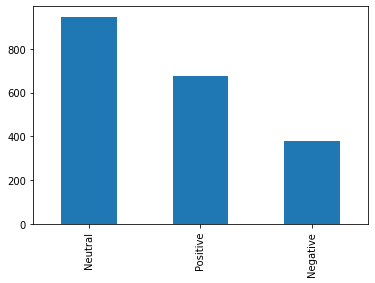

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

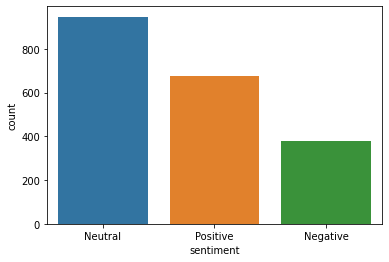

In [ ]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [ ]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [ ]:
positive_tweet

1       RT The story of a young pregnant woman that we...
3       RT She was a good person Nobody ever deserves ...
7       Daughter of the River Country: the love and re...
15      RT GUILTY â€œA dark brilliant thriller Many tw...
21                      RT A very interesting article by 
                              ...                        
1986    RT who is trying to overruled the age old syst...
1992    RT Hello You may be aware that Husbands have n...
1996    RT Been taken to court 5x (and counting) withi...
1997    RT My niece just sent this to me she pretty co...
1998    âš ï¸Trigger Warning âš ï¸ If anyone can do ...
Name: clean_tweet, Length: 676, dtype: object

In [ ]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
positive_tweet_list

['RT story young pregnant woman forced turn away week â\x81£â\x81£â\x81£â\x81£â\x81£As lockdown tâ€¦',
 'RT good person deserves die â€” murdered differences relationshipâ€¦',
 'Daughter River Country: love resilience Dianne OBrien',
 'RT GUILTY â€œA dark brilliant thriller twists turns author adds touches humour bring main châ€¦',
 'RT interesting article',
 'man implies isnt time shes attacked',
 'RT Amanda Stoker rejects 10 days paid leave â€œtoo burden employersâ€\x9d Assâ€¦',
 'Iâ€™m amp 3 adult kids struggle',
 'RT Thank joining tonightâ€™s Wednesday diary hope great weekâ€¦',
 'morning shared story New Zealand Instagram platform Iâ€™m blessed able reach soâ€¦',
 'RT Excited giving forthcoming guest lecture Great opportunity showcase excellent worâ€¦',
 'RT important repeal archaic matrimonial laws crippling youth India Misuse',
 'length skirt mean yes *# stop sexual abuse women',
 '*JOB ALERT* u PhD want 2work field Join team New vacancy…',
 'Words powerful weapons powerful let 

In [ ]:
# Tokenization
for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

Streaming output truncated to the last 5000 lines.
counts
child
sexual
2008
fled
claiming
unfit
tâ€¦
RT
Malka
Leifer
charged
74
counts
child
sexual
2008
fled
claiming
unfit
stâ€¦
RT
official:
religious
organisations
pose
real
threat
children
Percentage
teen
abuse
victims
report
assailant
intimate:
76
RT
Percentage
teen
abuse
victims
report
assailant
intimate:
76
RT
Revealing
real
devastation
childhood
trauma
victims
life
hope
realisationâ€¦
RT
ignore
wellmeaning
solution
adults
child
teased
bullied
incredibly
damaging
Saâ€¦
Delighted
hear
100th
Implementing
Organisation
signed
InterAgency
Misconduct
Disclosureâ€¦
thoroughly
recommend
emotive
story
heartfelt
tale
mix
sadness
humour
loved
thâ€¦
police
officer
abusive
exhusband
tries
turn
blame
victim
shes
able
ovâ€¦
doesnâ€™t
work
NT
kids
bullies
persistent
teaching
victim
thâ€¦
RT
doesnâ€™t
work
NT
kids
bullies
persistent
teaching
victim
theyâ€™re
sâ€¦
DAY
refuse
express
kind
physical
emotional
discomfort
people
hand
got
stuck
inâ€¦
Iâ€

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [ ]:
pos_tokens

['RT',
 'story',
 'young',
 'pregnant',
 'woman',
 'forced',
 'turn',
 'away',
 'week',
 'â\x81£â\x81£â\x81£â\x81£â\x81£As',
 'lockdown',
 'tâ€¦',
 'RT',
 'good',
 'person',
 'deserves',
 'die',
 'â€”',
 'murdered',
 'differences',
 'relationshipâ€¦',
 'Daughter',
 'River',
 'Country:',
 'love',
 'resilience',
 'Dianne',
 'OBrien',
 'RT',
 'GUILTY',
 'â€œA',
 'dark',
 'brilliant',
 'thriller',
 'twists',
 'turns',
 'author',
 'adds',
 'touches',
 'humour',
 'bring',
 'main',
 'châ€¦',
 'RT',
 'interesting',
 'article',
 'man',
 'implies',
 'isnt',
 'time',
 'shes',
 'attacked',
 'RT',
 'Amanda',
 'Stoker',
 'rejects',
 '10',
 'days',
 'paid',
 'leave',
 'â€œtoo',
 'burden',
 'employersâ€\x9d',
 'Assâ€¦',
 'Iâ€™m',
 'amp',
 '3',
 'adult',
 'kids',
 'struggle',
 'RT',
 'Thank',
 'joining',
 'tonightâ€™s',
 'Wednesday',
 'diary',
 'hope',
 'great',
 'weekâ€¦',
 'morning',
 'shared',
 'story',
 'New',
 'Zealand',
 'Instagram',
 'platform',
 'Iâ€™m',
 'blessed',
 'able',
 'reach',
 'soâ€¦',

In [ ]:
# Get Most Commonest Keywords
from collections import Counter

In [ ]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result


In [ ]:
get_tokens(pos_tokens)

{'New': 16,
 'RT': 275,
 'Thanks': 25,
 'Violence': 21,
 'abuse': 60,
 'amp': 54,
 'child': 29,
 'children': 22,
 'domestic': 28,
 'family': 15,
 'good': 14,
 'great': 17,
 'help': 28,
 'important': 16,
 'know': 20,
 'latest': 29,
 'life': 15,
 'like': 17,
 'men': 19,
 'new': 18,
 'people': 20,
 'report': 20,
 'right': 19,
 'sexual': 29,
 'story': 23,
 'time': 17,
 'victims': 31,
 'violence': 28,
 'woman': 14,
 'women': 36}

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [ ]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])

In [ ]:
pos_df

,words,scores
0,RT,275
1,abuse,60
2,amp,54
3,women,36
4,victims,31
5,sexual,29
6,latest,29
7,child,29
8,domestic,28
9,violence,28


In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [ ]:
neg_df

,words,scores
0,RT,152
1,amp,48
2,women,27
3,abuse,27
4,people,21
5,help,19
6,woman,18
7,victims,17
8,men,17
9,domestic,16


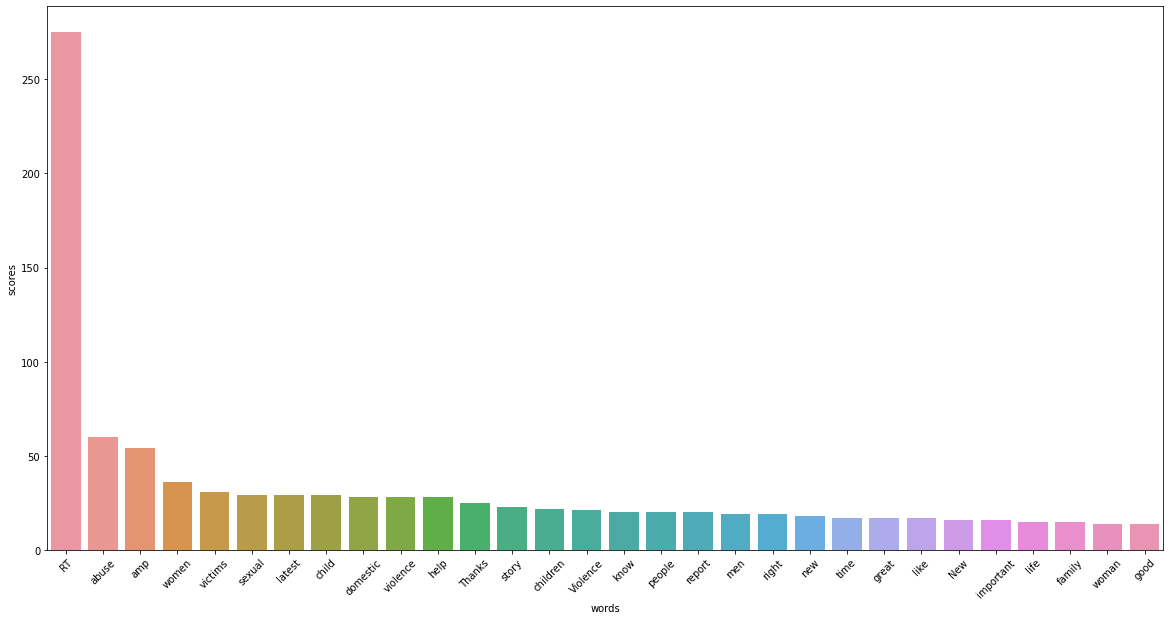

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

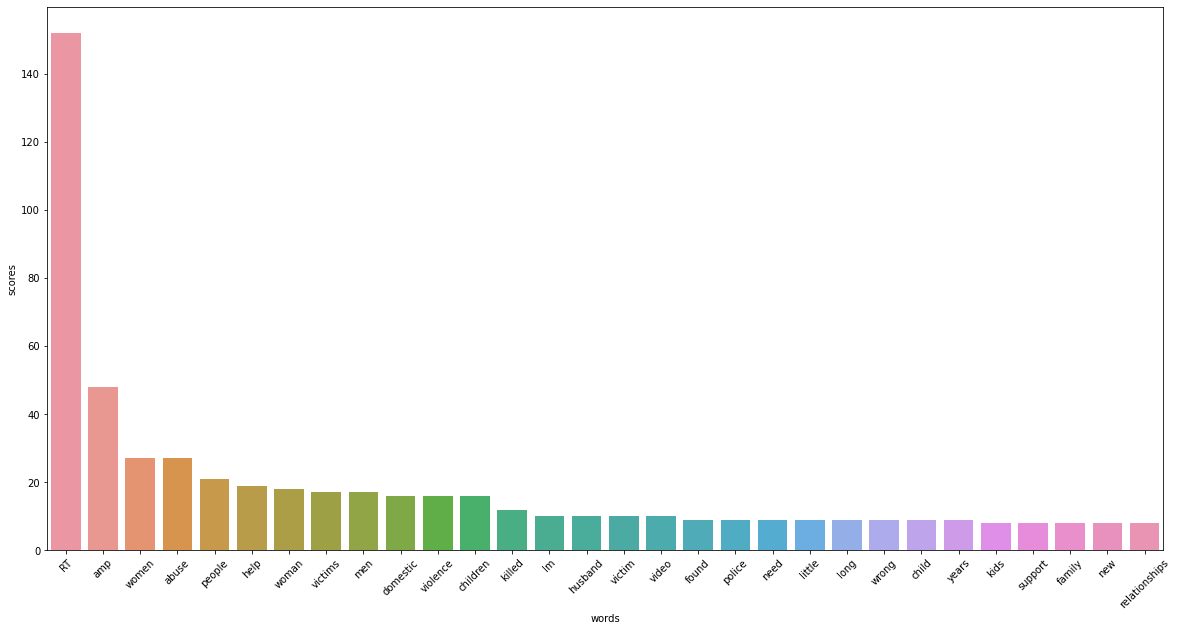

In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

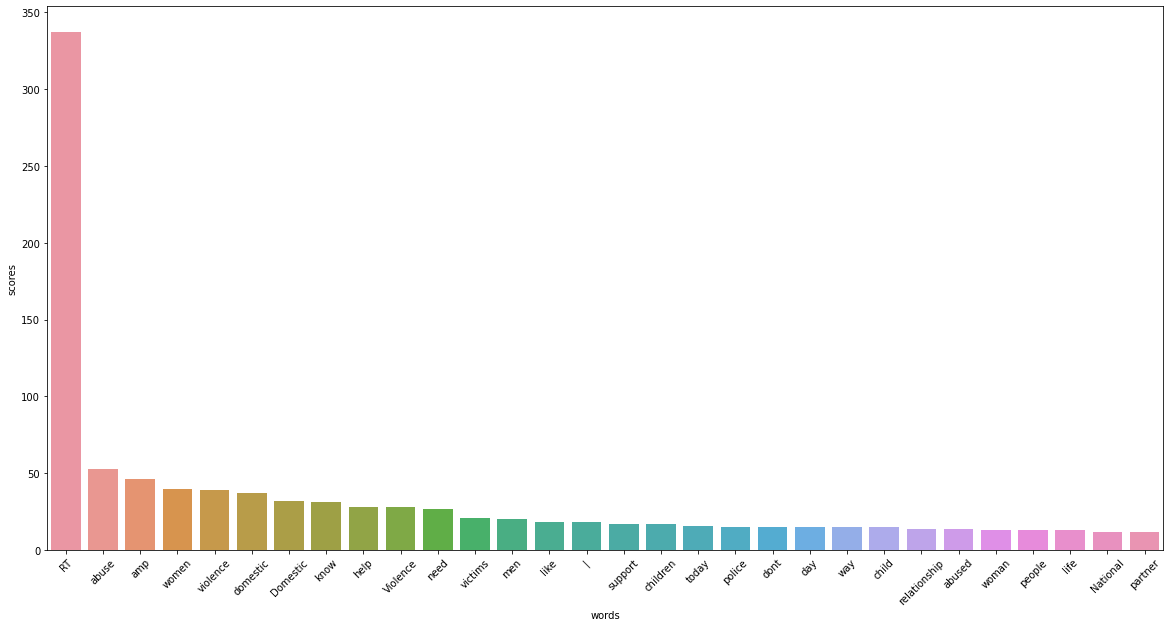

In [ ]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

,date,tweets,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,9/11/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...,"[#domesticviolence, #pandemic]",RT On during the from ðŸ‘‡,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...,[],RT The story of a young pregnant woman that we...,"{'polarity': 0.07166666666666666, 'subjectivit...",0.071667,0.405,Positive
2,9/13/2021 4:15:00 AM,RT @IS_sociology: On #domesticviolence during ...,"[#domesticviolence, #pandemic]",RT On during the from ðŸ‘‡,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob...",[],RT She was a good person Nobody ever deserves ...,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700000,0.600,Positive
4,9/15/2021 4:15:00 AM,#Divorce During A #Pandemic https://t.co/oEsEa...,"[#Divorce, #Pandemic, #childcustody, #domestic...",During A,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000,Neutral


In [ ]:
df["sentiment"].value_counts()

Neutral     947
Positive    676
Negative    377
Name: sentiment, dtype: int64

In [ ]:
removeble_neutrals = df[ df['sentiment'] == "Neutral" ].index
df.drop(removeble_neutrals, inplace = True)
df["sentiment"] = df["sentiment"].astype('category')
df["sentiment_cat"] = df["sentiment"].cat.codes
df.head(11)

,date,tweets,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment,sentiment_cat
1,9/12/2021 4:15:00 AM,RT @dv_west: The story of a young pregnant wom...,[],RT The story of a young pregnant woman that we...,"{'polarity': 0.07166666666666666, 'subjectivit...",0.071667,0.405000,Positive,1
3,9/14/2021 4:15:00 AM,"RT @endvawnetwork: ""She was a good person. Nob...",[],RT She was a good person Nobody ever deserves ...,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700000,0.600000,Positive,1
6,9/17/2021 4:15:00 AM,This person says 7k kids are 'impacted' by leg...,[],This person says 7k kids are impacted by legal...,"{'polarity': -0.10416666666666667, 'subjectivi...",-0.104167,0.295833,Negative,0
7,9/18/2021 4:15:00 AM,Daughter of the River Country: the love and re...,[],Daughter of the River Country: the love and re...,"{'polarity': 0.5, 'subjectivity': 0.6, 'sentim...",0.500000,0.600000,Positive,1
10,9/21/2021 4:15:00 AM,RT @AndreeaVraciu: MINDLESS #NFTcollection has...,[#NFTcollection],RT MINDLESS has now 9 collectors Thank you again,"{'polarity': -0.2, 'subjectivity': 0.9, 'senti...",-0.200000,0.900000,Negative,0
14,9/25/2021 4:15:00 AM,GUILTY â€œThis dark psych thriller is a cracki...,[],GUILTY â€œThis dark psych thriller is a cracki...,"{'polarity': -0.325, 'subjectivity': 0.7, 'sen...",-0.325000,0.700000,Negative,0
15,9/26/2021 4:15:00 AM,RT @The__SadieRyan: GUILTY â€œA dark brilliant...,[],RT GUILTY â€œA dark brilliant thriller Many tw...,"{'polarity': 0.18333333333333332, 'subjectivit...",0.183333,0.646667,Positive,1
17,9/28/2021 4:15:00 AM,#DomesticViolence #Murder accused found guilty...,"[#DomesticViolence, #Murder, #FamilyViolence]",accused found guilty of bashing partner Eden ...,"{'polarity': -0.5, 'subjectivity': 1.0, 'senti...",-0.500000,1.000000,Negative,0
21,10/2/2021 4:15:00 AM,RT @SimonLapierre: A very interesting article ...,"[#coercivecontrol, #domesticviolence]",RT A very interesting article by,"{'polarity': 0.65, 'subjectivity': 0.65, 'sent...",0.650000,0.650000,Positive,1
24,10/5/2021 4:15:00 AM,A man and implies this isn't the first time sh...,[#DomesticAbuseâ€¦],A man and implies this isnt the first time she...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.250000,0.333333,Positive,1


In [ ]:
df["sentiment"].value_counts()

Positive    676
Negative    377
Name: sentiment, dtype: int64

In [ ]:
df["sentiment_cat"].value_counts()

1    676
0    377
Name: sentiment_cat, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df["clean_tweet"], df["sentiment_cat"], random_state = 50)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer().fit(X_train)

In [ ]:
len(vect.get_feature_names())

3262

In [ ]:
X_train_vectorized = vect.transform(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(vect.transform(X_test))

In [ ]:
print(predictions)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1]


In [ ]:
# Compute Accuracy
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(Y_test, predictions))

AUC: 0.5927835051546392


In [ ]:
import numpy as np

In [ ]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

In [ ]:
print("smallest coef", feature_names[sorted_coef_index[:20]])

smallest coef ['disgusting' 'other' 'little' 'husband' 'wrong' 'are' 'not' 'violent'
 'before' 'watch' 'criminal' 'down' 'amp' 'parents' 'man' 'shocking'
 'people' 'do' 'mental' 'long']


In [ ]:
print("largest coef", feature_names[sorted_coef_index[:-21:-1]])

largest coef ['more' 'latest' 'sexual' 'our' 'great' 'thanks' 'we' 'many' 'good'
 'right' 'on' 'new' 'love' 'real' 'really' 'for' 'you' 'better' 'safe'
 'true']
